# Preparing basic knowledge for Classification

The code below is using Python with the Pandas and Scikit-learn libraries to create a word matrix from a list of strings.

In [26]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Define the text
lines = [
    'The sun sets over the quiet meadow.',
    'Birds chirp softly in the early morning.',
    'A gentle breeze rustles the autumn leaves.',
    'Stars twinkle brightly in the clear night sky.'
]

# Creat the CountVectorizer instance, the stop_words parameter is set to "english"
# to remove common English stop words like "and", "the", and "a"
vectorizer = CountVectorizer(stop_words='english')

# Convert the text to vectorizer
word_matrix = vectorizer.fit_transform(lines)

# The get_feature_names_out method is used to get the feature names 
# (i.e., the individual words) in the word matrix
feature_names = vectorizer.get_feature_names_out()

# The line_names list is created to store the names of each line in the original
# list of strings
line_names = [f'Line {(i + 1):d}' for i, _ in enumerate(word_matrix)]

# A Pandas DataFrame is created using the word_matrix.toarray() method to convert 
# the sparse matrix to a dense array
df = pd.DataFrame(data=word_matrix.toarray(), index=line_names,columns=feature_names)

# The head() method is called on the resulting DataFrame to display the first few 
# rows of the matrix
df.head()

,autumn,birds,breeze,brightly,chirp,clear,early,gentle,leaves,meadow,morning,night,quiet,rustles,sets,sky,softly,stars,sun,twinkle
Line 1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0
Line 2,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
Line 3,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0
Line 4,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1


# Exercise - Part 4.1 - Develop the text classification model for the traffic sentiment analysis

The following code is utilized for traffic sentiment analysis and employs the Pakistani Traffic Sentiment Analysis dataset as an illustrative example. This dataset comprises two columns: 'Text' and 'Sentiment.' The 'Text' column encompasses sentiments related to Pakistani traffic, encompassing both positive and negative reviews. The 'Sentiment' column is employed to categorize each sentiment, with positive reviews labeled as '0' and negative reviews as '1'.

As discussed in the lecture, the sentiment analysis is modeled as a binary classification problem. The task will use the Logistic Regression as the classification model and guide you through the step-by-step process of the whole process of the model development for the traffic sentiment analysis.   

Load the dataset:

In [27]:
import pandas as pd
import os

# The path of the dataset
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_4_Text_classification/Pakistani%20Traffic%20sentiment%20Analysis.csv'

# Load the data use the pandas
df = pd.read_csv(url)

# Display the data
df.head()

,Text,Sentiment
0,Adayala road is clear,0
1,Traffic jam from parbat rd to nazim-ud-din rd ...,1
2,Mandra is clear,0
3,Fort street is clear,0
4,"Mashriq Hotel towards Fawara Chowk, City Sadda...",1


Using the wordcloud to visualize the dataset



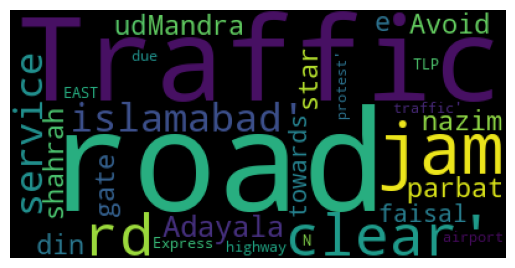

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = df['Text'].values

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Print a brief summary of the dataset

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2109 entries, 0 to 2108
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       2109 non-null   object
 1   Sentiment  2109 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 33.1+ KB


Use the following statement to see how many instances there are of each class (0 for positive and 1 for negative):

In [30]:
# Displaying the instances of each class
df.groupby('Sentiment').describe()

Text                                                               
          count unique                                                top freq
Sentiment                                                                     
0          1010   1008                   Traffic open at shahrah e faisal    2
1          1099   1079  Road is closed for traffic at star gate toward...    3

There is an even number of positive and negative samples, but in each case, the number of unique samples is less than the number of samples for that class. That means the dataset has duplicate rows, and duplicate rows could bias a machine learning model. Use the following statements to delete the duplicate rows and check for balance again:

In [31]:
# Delete the duplicate rows
df = df.drop_duplicates()

# Displaying the instances of each class
df.groupby('Sentiment').describe()

Text                                                               
          count unique                                                top freq
Sentiment                                                                     
0          1008   1008                              Adayala road is clear    1
1          1079   1079  Traffic jam from parbat rd to nazim-ud-din rd ...    1

Now there are no duplicate rows, and the number of positive and negative samples is roughly equal.

Next, use CountVectorizer to prepare and vectorize the text in the Text column:

In [32]:
# Convert the text to vectorizer
x = df['Text']

# Obtain the label
y = df['Sentiment']

Now split the dataset for training and testing. We’ll use a 80/20 split since there are almost 2,000 samples in total:

In [33]:
from sklearn.model_selection import train_test_split

# Splite the train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

# Create the CountVectorizer instance, the ngram_range represents the length range 
# of phrase segmentation,the stop_words parameter is set to "english" to remove 
# common English stop words like "and", "the", and "a", min_df is to serve as a 
# threshold to delete some words which have a frequency lower then min_df.
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english', min_df=20)

x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

The next step is to train a classifier. We’ll use Scikit’s LogisticRegression class, which uses logistic regression to fit a model to the data:

In [35]:
from sklearn.linear_model import LogisticRegression

# Creat the model, max_iter controls the maximum number of iterations, 
# random_state provides a seed for the random number generator
model = LogisticRegression(max_iter=1000, random_state=0)

# Trains the logistic regression model using the training data.
model.fit(x_train_vectorized, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,0
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


Validate the trained model with the 20% of the dataset set aside for testing and show the results in a confusion matrix and accuracy:

The accuracy of the model is: 0.937799043062201


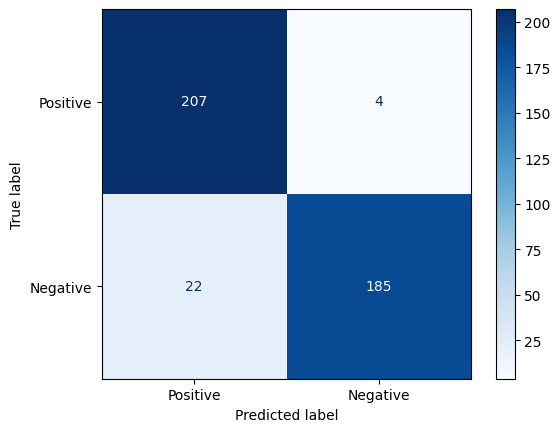

In [36]:
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.metrics import accuracy_score

# Show the results in a confusion matrix
cmd.from_estimator(model, x_test_vectorized, y_test, display_labels=['Positive','Negative'], cmap='Blues')

# Calculate accuracy
print('The accuracy of the model is: ' + str(accuracy_score(y_test, model.predict(x_test_vectorized))))

***Activity during the break: Let’s fool the model***

Analyzing text for sentiment. Use the following statements to produce a sentiment score and classification for the sentence “Adayala road is clear”.

you can phrase some your own reviews (e.g., suppose you want make a post on social media, what you would write about your own experience on traffic or public transport travels in your city).

you can also try to fool the model and compare the results with ChatGPT.

In [37]:
# Here you change the reviews
text = 'Adayala road is very good'

# Make a prediction for this review
score=model.predict_proba(vectorizer.transform([text]))[0][1]

if score > 0.5:
  attitude='negative'
else:
  attitude='positive'

print('The prediction result of this review is: '+ attitude)

The prediction result of this review is: negative


# Exercise - Part 4.2 - Explore the performance of different text vectorization methods

The task will explore the impact of text vectorization methods on traffic sentiment analysis performance. You are expected to explore three different text vectorization models: CountVectorizer, HashingVectorizer, and TfidfVectorizer.  

The accuracy of the model is: 0.937799043062201
The accuracy of the model is: 0.9545454545454546
The accuracy of the model is: 0.9545454545454546


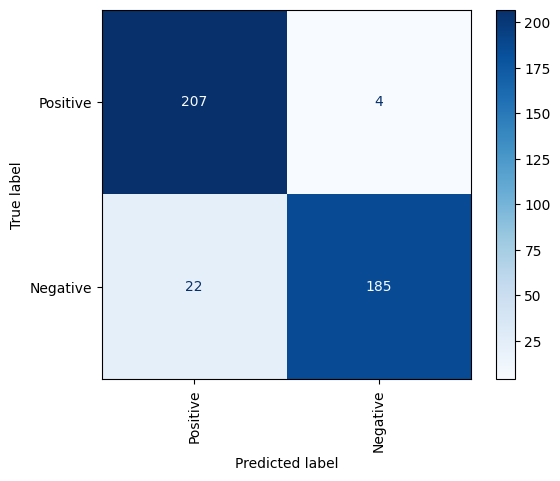

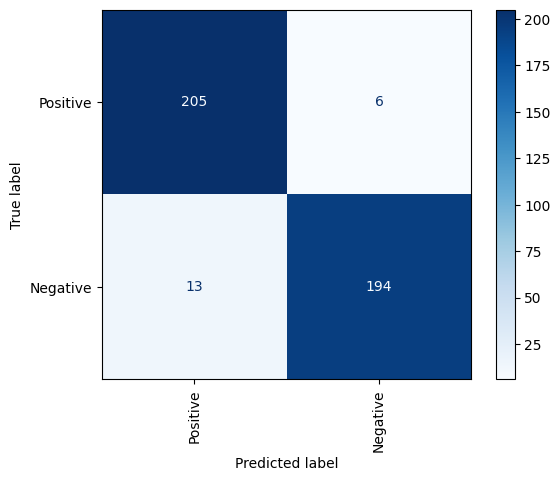

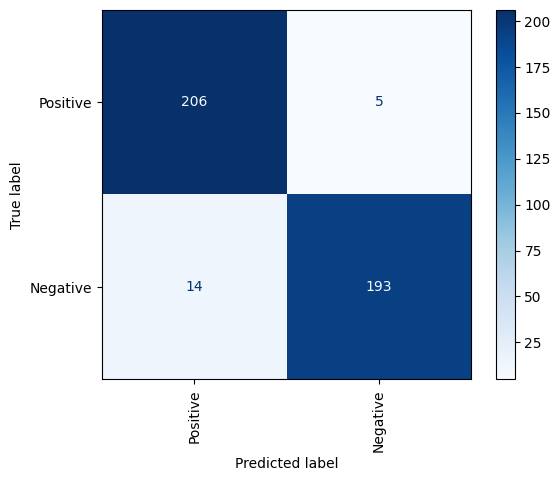

In [38]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd
import os

# here you can try use different vectorization methods (Attention! uncomment the
# method you want to test, and comment out the other methods)
#-*-*-*-*-*-*chose different vectorization-*-*-*-*-*-*

#(1) CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english', min_df=20)

#(2) #HashingVectorizer
vectorizer_2 = HashingVectorizer(ngram_range=(1, 2), n_features=200)

#(3)TfidfVectorizer
vectorizer_3 = TfidfVectorizer(
     min_df=20,
     norm='l2',
     smooth_idf=True,
     use_idf=True,
     ngram_range=(1, 2),
     stop_words='english'
     )

#-*-*-*-*-*-*chose different vectorization-*-*-*-*-*-*
x = df['Text']
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# apply the vectorizers
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)
x_train_vectorized_2 = vectorizer_2.fit_transform(x_train)
x_test_vectorized_2 = vectorizer_2.transform(x_test)
x_train_vectorized_3 = vectorizer_3.fit_transform(x_train)
x_test_vectorized_3 = vectorizer_3.transform(x_test)


model = LogisticRegression(max_iter=1000, random_state=0)
model_2 = LogisticRegression(max_iter=1000, random_state=0)
model_3 = LogisticRegression(max_iter=1000, random_state=0)

model.fit(x_train_vectorized, y_train)
cmd.from_estimator(
    model, 
    x_test_vectorized, 
    y_test, 
    display_labels=['Positive','Negative'], 
    cmap='Blues', 
    xticks_rotation='vertical'
    )
model_2.fit(x_train_vectorized_2, y_train)
cmd.from_estimator(
    model_2, 
    x_test_vectorized_2, 
    y_test, 
    display_labels=['Positive','Negative'], 
    cmap='Blues', 
    xticks_rotation='vertical'
    )

model_3.fit(x_train_vectorized_3, y_train)
cmd.from_estimator(
    model_3, 
    x_test_vectorized_3, 
    y_test, 
    display_labels=['Positive','Negative'], 
    cmap='Blues', 
    xticks_rotation='vertical'
    )


#calculate accuracy
print('The accuracy of the model is: '+str(accuracy_score(y_test,model.predict(x_test_vectorized))))
print('The accuracy of the model is: '+str(accuracy_score(y_test,model_2.predict(x_test_vectorized_2))))
print('The accuracy of the model is: '+str(accuracy_score(y_test,model_3.predict(x_test_vectorized_3))))

# Exercise - part 4.3-Explore the performance of different text classification models

The task will explore the performance of different models in traffic sentiment analysis. You are expected to explore different text classification methods, including LR, KNN, RF, XGBoost, etc.  

The accuracy of the Logistic Regression model is: 0.9521531100478469
The accuracy of the KNN model is: 0.8923444976076556
The accuracy of the XGBoost model is: 0.9712918660287081
The accuracy of the SVM model is: 0.9545454545454546
The accuracy of the Naive Bayes model is: 0.9401913875598086


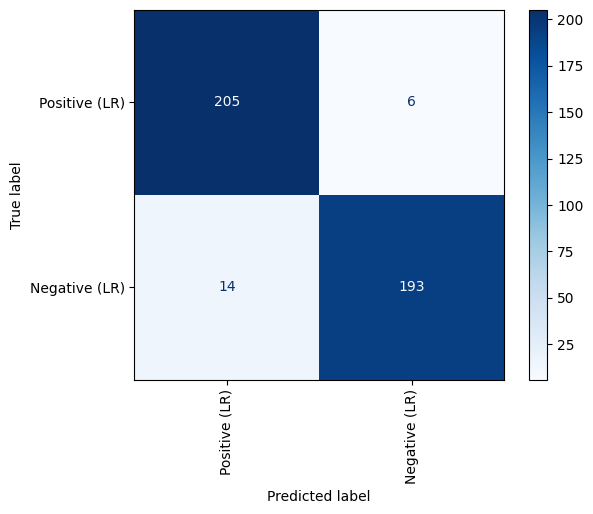

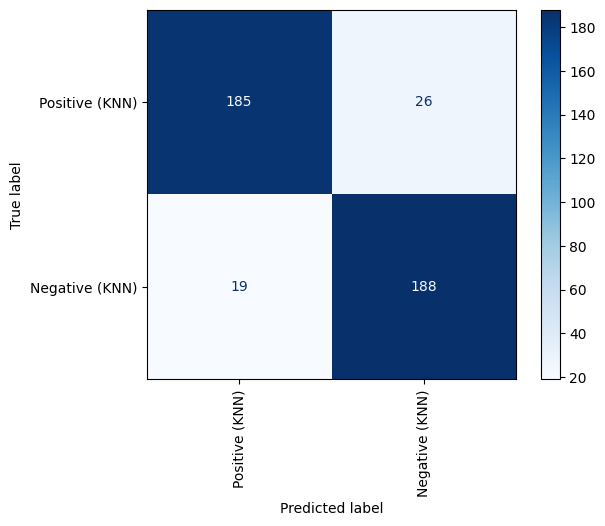

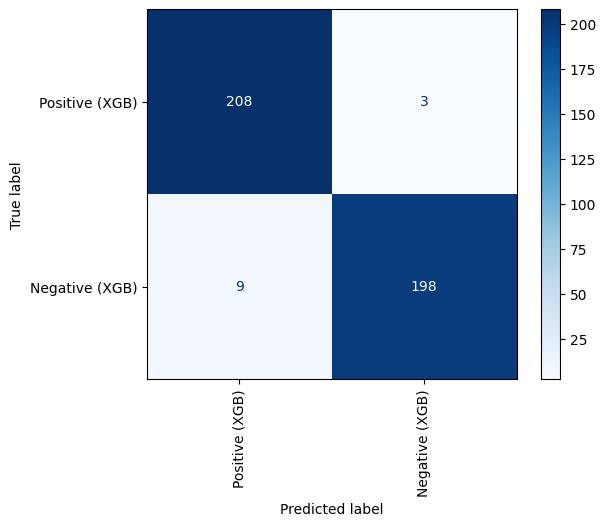

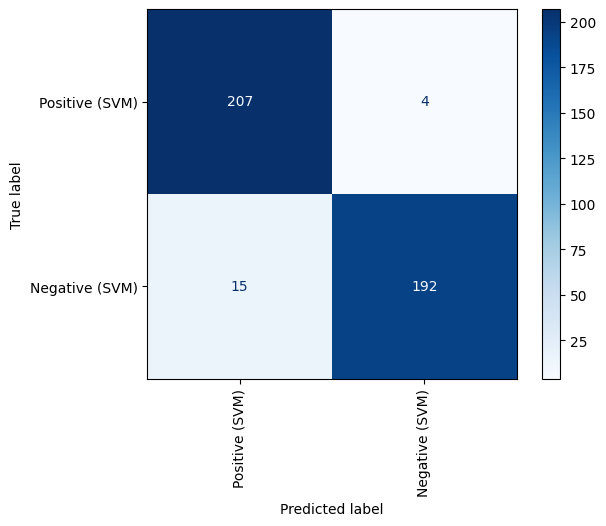

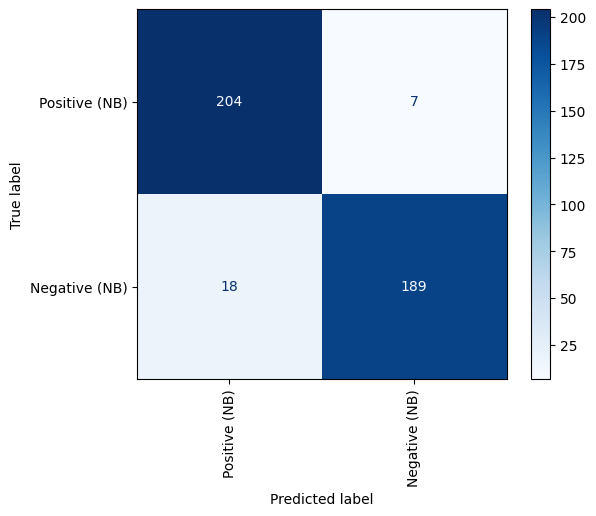

In [39]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
import os

vectorizer = TfidfVectorizer(
    min_df=20,
    norm='l2',
    smooth_idf=True,
    use_idf=True,
    ngram_range=(1, 1),
    stop_words='english'
    )

# split into train/test set
x = df['Text']
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# apply the vectorizers
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

# here you can try use different models (Attention! uncomment the method you want
# to test, and comment out the other methods)


#-*-*-*-*-*-*chose different models-*-*-*-*-*-*

#(1)LR
model = LogisticRegression(max_iter=1000, random_state=0)

#(2)KNN
model_knn= KNeighborsClassifier()

#(3)RF
model_rf = RandomForestClassifier(random_state=0)

#(4)XGBoost
model_xgb =  XGBClassifier()

#(5)SVM
model_svm= SVC(kernel="linear")

#(6)Naïve Bayes models
model_nb = BernoulliNB()
#-*-*-*-*-*-*chose different models-*-*-*-*-*-*
model.fit(x_train_vectorized, y_train)
model_knn.fit(x_train_vectorized, y_train)
model_xgb.fit(x_train_vectorized, y_train)
model_svm.fit(x_train_vectorized, y_train)
model_nb.fit(x_train_vectorized, y_train)

cmd.from_estimator(
    model, 
    x_test_vectorized, 
    y_test,
    display_labels=['Positive (LR)','Negative (LR)'],
    cmap='Blues', 
    xticks_rotation='vertical',
    )

cmd.from_estimator(
    model_knn, 
    x_test_vectorized, 
    y_test,
    display_labels=['Positive (KNN)','Negative (KNN)'],
    cmap='Blues', 
    xticks_rotation='vertical'
    )

cmd.from_estimator(
    model_xgb, 
    x_test_vectorized, 
    y_test,
    display_labels=['Positive (XGB)','Negative (XGB)'],
    cmap='Blues', 
    xticks_rotation='vertical'
    )

cmd.from_estimator(
    model_svm, 
    x_test_vectorized, 
    y_test,
    display_labels=['Positive (SVM)','Negative (SVM)'],
    cmap='Blues', 
    xticks_rotation='vertical'
    )

cmd.from_estimator(
    model_nb, 
    x_test_vectorized, 
    y_test,
    display_labels=['Positive (NB)','Negative (NB)'],
    cmap='Blues', 
    xticks_rotation='vertical'
    )

#calculate accuracy
print('The accuracy of the Logistic Regression model is: '+str(accuracy_score(y_test,model.predict(x_test_vectorized))))
print('The accuracy of the KNN model is: '+str(accuracy_score(y_test,model_knn.predict(x_test_vectorized))))
print('The accuracy of the XGBoost model is: '+str(accuracy_score(y_test,model_xgb.predict(x_test_vectorized))))
print('The accuracy of the SVM model is: '+str(accuracy_score(y_test,model_svm.predict(x_test_vectorized))))
print('The accuracy of the Naive Bayes model is: '+str(accuracy_score(y_test,model_nb.predict(x_test_vectorized))))

# Exercise - Assignment task-Find the best text classification model for the sentimental analysis (assignment submission)

The tasks for this part is use the grid search to: 
1. Identify which vectorization method works the best or basically not much difference. 
2. Identify which model, together with its corresponding hyperparameters, gives the best performance for traffic sentimental analysis.

You can either use the structure below or be a be a bit more explorative and try out other strategies we have discussed in the lecture/exercises to find the best parameters/model (e.g., Random Search, ROC curve,...).

In [40]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
import os
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


#-*-*-*-*-*-*chose different vectorization-*-*-*-*-*-*

#(1) CountVectorizer
vectorizer_count = CountVectorizer(ngram_range=(1, 2), stop_words='english',min_df=20)

#(2) #HashingVectorizer
vectorizer_hash = HashingVectorizer(ngram_range=(1, 2), n_features=200)

#(3)TfidfVectorizer
vectorizer_tfid = TfidfVectorizer(
    min_df=20,
    norm='l2',
    smooth_idf=True,
    use_idf=True,
    ngram_range=(1, 1),
    stop_words='english'
    )

#-*-*-*-*-*-*chose different vectorization-*-*-*-*-*-*

# split into train/test set
x = df['Text']
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# apply the vectorizers
x_train_vectorized_1 = vectorizer_count.fit_transform(x_train)
x_test_vectorized_1= vectorizer_count.transform(x_test)
x_train_vectorized_2 = vectorizer_hash.fit_transform(x_train)
x_test_vectorized_2= vectorizer_hash.transform(x_test)
x_train_vectorized_3 = vectorizer_tfid.fit_transform(x_train)
x_test_vectorized_3= vectorizer_tfid.transform(x_test)

results_df = pd.DataFrame(columns=["model", "accuracy_vectorizer_count", "accuracy_vectorizer_hash",
                           "accuracy_vectorizer_tfid","best_params_vectorizer_count", "best_params_vectorizer_hash",
                           "best_params_vectorizer_tfid" ])
"""
# here you can try use the grid search to find the best model parameter(a example is in SVM model)
#-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
#(1)LR
# model = LogisticRegression(max_iter=1000, random_state=0)
# param_grid = {
#     'C': [0.001, 0.01, 0.1, 1, 10, 100],
# }

#(2)KNN
# model=KNeighborsClassifier()
# param_grid = {
#     'n_neighbors': [3, 5, 7, 9],
#     'weights': ['uniform', 'distance']
# }

#(3)RF
# model = RandomForestClassifier(random_state=0)
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

#(4)XGBoost
# model =  XGBClassifier()
# param_grid = {
#     'learning_rate': [0.01, 0.1, 0.2],
#     'n_estimators': [100, 200, 300],
#     'max_depth': [3, 4, 5]
# }


#(5)SVM
model= SVC(probability=True)

# this is an example to use the grid search to find the best parameter for SVM model
# param_grid specifies the hyperparameter grid to search over： kernel types 
# ('linear', 'rbf', 'poly') and regularization strength C values（0.1, 1, 10）.
param_grid = {'kernel': ['linear', 'rbf', 'poly'],'C': [0.1, 1, 10]}

#`grid_search` performs a grid search with 5-fold cross-validation and evaluates models based on accuracy.
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

#`fit` method fits the model to the training data, systematically trying out all 
# parameter combinations.
grid_search.fit(x_train_vectorized, y_train)

#`best_params` and `best_score` store the best hyperparameters and their 
# corresponding accuracy score.
best_params = grid_search.best_params_
print(best_params)
best_score = grid_search.best_score_

#The `model` is updated with the best estimator found during the grid search, 
# which can be used for further analysis.
model = grid_search.best_estimator_

#(6)Naïve Bayes models
# model=BernoulliNB()
# param_grid = {'alpha': [0.1, 0.5, 1],'force_alpha': [True,False]}

#-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

cmd.from_estimator(
    model, 
    x_test_vectorized, 
    y_test,
    display_labels=['Positive','Negative'],
    cmap='Blues',
    xticks_rotation='vertical'
    )

#calculate accuracy
print('The accuracy of the model is: '+str(accuracy_score(y_test,model.predict(x_test_vectorized))))
"""
###dd

"\n# here you can try use the grid search to find the best model parameter(a example is in SVM model)\n#-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*\n#(1)LR\n# model = LogisticRegression(max_iter=1000, random_state=0)\n# param_grid = {\n#     'C': [0.001, 0.01, 0.1, 1, 10, 100],\n# }\n\n#(2)KNN\n# model=KNeighborsClassifier()\n# param_grid = {\n#     'n_neighbors': [3, 5, 7, 9],\n#     'weights': ['uniform', 'distance']\n# }\n\n#(3)RF\n# model = RandomForestClassifier(random_state=0)\n# param_grid = {\n#     'n_estimators': [100, 200, 300],\n#     'max_depth': [None, 10, 20, 30],\n#     'min_samples_split': [2, 5, 10],\n#     'min_samples_leaf': [1, 2, 4]\n# }\n\n#(4)XGBoost\n# model =  XGBClassifier()\n# param_grid = {\n#     'learning_rate': [0.01, 0.1, 0.2],\n#     'n_estimators': [100, 200, 300],\n#     'max_depth': [3, 4, 5]\n# }\n\n\n#(5)SVM\nmodel= SVC(probability=True)\n\n# this is an example to use the grid search to find the best parameter for SVM model\n# param_grid specifies the hy

Now for each model type and each vectorization type, a Random Search is performed

In [41]:
## Logistic Regression
model_1 = LogisticRegression(max_iter=1000, random_state=0)
model_2 = LogisticRegression(max_iter=1000, random_state=0)
model_3 = LogisticRegression(max_iter=1000, random_state=0)

param_grid = {
     'C': [0.001, 0.01, 0.1, 1, 10, 100],
}

random_search_1 = RandomizedSearchCV(estimator=model_1, param_distributions=param_grid, n_iter = 20,cv=5, scoring='accuracy')
random_search_2 = RandomizedSearchCV(estimator=model_2, param_distributions=param_grid, n_iter = 20,cv=5, scoring='accuracy')
random_search_3 = RandomizedSearchCV(estimator=model_3, param_distributions=param_grid, n_iter = 20,cv=5, scoring='accuracy')

#
random_search_1.fit(x_train_vectorized_1, y_train)
random_search_2.fit(x_train_vectorized_2, y_train)
random_search_3.fit(x_train_vectorized_3, y_train)

#`best_params` and `best_score` store the best hyperparameters and their 
# corresponding accuracy score.
best_params_1 = random_search_1.best_params_
best_score_1 = random_search_1.best_score_
best_params_2 = random_search_2.best_params_
best_score_2 = random_search_2.best_score_
best_params_3 = random_search_3.best_params_
best_score_3 = random_search_3.best_score_

#The `model` is updated with the best estimator found during the grid search, 
# which can be used for further analysis.
model_1 = random_search_1.best_estimator_
model_2 = random_search_2.best_estimator_
model_3 = random_search_3.best_estimator_

accuracy_1 = accuracy_score(y_test,model_1.predict(x_test_vectorized_1))
accuracy_2 = accuracy_score(y_test,model_2.predict(x_test_vectorized_2))
accuracy_3 = accuracy_score(y_test,model_3.predict(x_test_vectorized_3))



new_df = pd.DataFrame(data={"model": ["Logistic Regression"], "accuracy_vectorizer_count": [accuracy_1], 
                            "accuracy_vectorizer_hash": [accuracy_2],
                           "accuracy_vectorizer_tfid": [accuracy_3],
                           "best_params_vectorizer_count": [str(best_params_1)],
                           "best_params_vectorizer_hash": [str(best_params_2)],
                           "best_params_vectorizer_tfid": [str(best_params_3)]})

results_df = pd.concat([results_df,new_df], axis=0)
results_df[results_df["model"] == "Logistic Regression"]

d:\KTH\Applied Artificial Intelligence in Transportation\AH2179-Lab_2\.venv\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=20. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
d:\KTH\Applied Artificial Intelligence in Transportation\AH2179-Lab_2\.venv\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=20. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
d:\KTH\Applied Artificial Intelligence in Transportation\AH2179-Lab_2\.venv\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=20. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\jemaa\AppData\Local\Temp\ipykernel_23760\2341502821.py:47: FutureWarning: The behavior of DataFrame concatenation with empty or

,model,accuracy_vectorizer_count,accuracy_vectorizer_hash,accuracy_vectorizer_tfid,best_params_vectorizer_count,best_params_vectorizer_hash,best_params_vectorizer_tfid
0,Logistic Regression,0.937799,0.949761,0.954545,{'C': 1},{'C': 10},{'C': 0.1}


In [42]:
## KNN
model_1 = KNeighborsClassifier()
model_2 = KNeighborsClassifier()
model_3 = KNeighborsClassifier()

param_grid = {
     'n_neighbors': [3, 5, 7, 9],
     'weights': ['uniform', 'distance']
}


random_search_1 = RandomizedSearchCV(estimator=model_1, param_distributions=param_grid, n_iter = 20,cv=5, scoring='accuracy')
random_search_2 = RandomizedSearchCV(estimator=model_2, param_distributions=param_grid, n_iter = 20,cv=5, scoring='accuracy')
random_search_3 = RandomizedSearchCV(estimator=model_3, param_distributions=param_grid, n_iter = 20,cv=5, scoring='accuracy')

#
random_search_1.fit(x_train_vectorized_1, y_train)
random_search_2.fit(x_train_vectorized_2, y_train)
random_search_3.fit(x_train_vectorized_3, y_train)

#`best_params` and `best_score` store the best hyperparameters and their 
# corresponding accuracy score.
best_params_1 = random_search_1.best_params_
best_score_1 = random_search_1.best_score_
best_params_2 = random_search_2.best_params_
best_score_2 = random_search_2.best_score_
best_params_3 = random_search_3.best_params_
best_score_3 = random_search_3.best_score_

#The `model` is updated with the best estimator found during the grid search, 
# which can be used for further analysis.
model_1 = random_search_1.best_estimator_
model_2 = random_search_2.best_estimator_
model_3 = random_search_3.best_estimator_

accuracy_1 = accuracy_score(y_test,model_1.predict(x_test_vectorized_1))
accuracy_2 = accuracy_score(y_test,model_2.predict(x_test_vectorized_2))
accuracy_3 = accuracy_score(y_test,model_3.predict(x_test_vectorized_3))


new_df = pd.DataFrame(data={"model": ["KNN"], "accuracy_vectorizer_count": [accuracy_1], 
                            "accuracy_vectorizer_hash": [accuracy_2],
                           "accuracy_vectorizer_tfid": [accuracy_3],
                           "best_params_vectorizer_count": [str(best_params_1)],
                           "best_params_vectorizer_hash": [str(best_params_2)],
                           "best_params_vectorizer_tfid": [str(best_params_3)]})

results_df = pd.concat([results_df,new_df], axis=0)
results_df[results_df["model"] == "KNN"]

d:\KTH\Applied Artificial Intelligence in Transportation\AH2179-Lab_2\.venv\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=20. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
d:\KTH\Applied Artificial Intelligence in Transportation\AH2179-Lab_2\.venv\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=20. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
d:\KTH\Applied Artificial Intelligence in Transportation\AH2179-Lab_2\.venv\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=20. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


,model,accuracy_vectorizer_count,accuracy_vectorizer_hash,accuracy_vectorizer_tfid,best_params_vectorizer_count,best_params_vectorizer_hash,best_params_vectorizer_tfid
0,KNN,0.925837,0.952153,0.909091,"{'weights': 'uniform', 'n_neighbors': 5}","{'weights': 'uniform', 'n_neighbors': 9}","{'weights': 'distance', 'n_neighbors': 5}"


In [43]:
## RF
model_1 = RandomForestClassifier(random_state=0)
model_2 = RandomForestClassifier(random_state=0)
model_3 = RandomForestClassifier(random_state=0)


param_grid = {
     'n_estimators': [100, 200, 300],
     'max_depth': [None, 10, 20, 30],
     'min_samples_split': [2, 5, 10],
     'min_samples_leaf': [1, 2, 4]
 }


random_search_1 = RandomizedSearchCV(estimator=model_1, param_distributions=param_grid, n_iter = 20,cv=5, scoring='accuracy')
random_search_2 = RandomizedSearchCV(estimator=model_2, param_distributions=param_grid, n_iter = 20,cv=5, scoring='accuracy')
random_search_3 = RandomizedSearchCV(estimator=model_3, param_distributions=param_grid, n_iter = 20,cv=5, scoring='accuracy')

#
random_search_1.fit(x_train_vectorized_1, y_train)
random_search_2.fit(x_train_vectorized_2, y_train)
random_search_3.fit(x_train_vectorized_3, y_train)

#`best_params` and `best_score` store the best hyperparameters and their 
# corresponding accuracy score.
best_params_1 = random_search_1.best_params_
best_score_1 = random_search_1.best_score_
best_params_2 = random_search_2.best_params_
best_score_2 = random_search_2.best_score_
best_params_3 = random_search_3.best_params_
best_score_3 = random_search_3.best_score_

#The `model` is updated with the best estimator found during the grid search, 
# which can be used for further analysis.
model_1 = random_search_1.best_estimator_
model_2 = random_search_2.best_estimator_
model_3 = random_search_3.best_estimator_

accuracy_1 = accuracy_score(y_test,model_1.predict(x_test_vectorized_1))
accuracy_2 = accuracy_score(y_test,model_2.predict(x_test_vectorized_2))
accuracy_3 = accuracy_score(y_test,model_3.predict(x_test_vectorized_3))


new_df = pd.DataFrame(data={"model": ["Random Forests"], "accuracy_vectorizer_count": [accuracy_1], 
                            "accuracy_vectorizer_hash": [accuracy_2],
                           "accuracy_vectorizer_tfid": [accuracy_3],
                           "best_params_vectorizer_count": [str(best_params_1)],
                           "best_params_vectorizer_hash": [str(best_params_2)],
                           "best_params_vectorizer_tfid": [str(best_params_3)]})

results_df = pd.concat([results_df,new_df], axis=0)
results_df[results_df["model"] == "Random Forests"]

,model,accuracy_vectorizer_count,accuracy_vectorizer_hash,accuracy_vectorizer_tfid,best_params_vectorizer_count,best_params_vectorizer_hash,best_params_vectorizer_tfid
0,Random Forests,0.964115,0.971292,0.9689,"{'n_estimators': 300, 'min_samples_split': 10,...","{'n_estimators': 300, 'min_samples_split': 5, ...","{'n_estimators': 300, 'min_samples_split': 5, ..."


In [44]:
## XGBoost
model_1 = XGBClassifier()
model_2 = XGBClassifier()
model_3 = XGBClassifier()

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
     'n_estimators': [100, 200, 300],
     'max_depth': [3, 4, 5]
}



random_search_1 = RandomizedSearchCV(estimator=model_1, param_distributions=param_grid, n_iter = 20,cv=5, scoring='accuracy')
random_search_2 = RandomizedSearchCV(estimator=model_2, param_distributions=param_grid, n_iter = 20,cv=5, scoring='accuracy')
random_search_3 = RandomizedSearchCV(estimator=model_3, param_distributions=param_grid, n_iter = 20,cv=5, scoring='accuracy')

#
random_search_1.fit(x_train_vectorized_1, y_train)
random_search_2.fit(x_train_vectorized_2, y_train)
random_search_3.fit(x_train_vectorized_3, y_train)

#`best_params` and `best_score` store the best hyperparameters and their 
# corresponding accuracy score.
best_params_1 = random_search_1.best_params_
best_score_1 = random_search_1.best_score_
best_params_2 = random_search_2.best_params_
best_score_2 = random_search_2.best_score_
best_params_3 = random_search_3.best_params_
best_score_3 = random_search_3.best_score_

#The `model` is updated with the best estimator found during the grid search, 
# which can be used for further analysis.
model_1 = random_search_1.best_estimator_
model_2 = random_search_2.best_estimator_
model_3 = random_search_3.best_estimator_

accuracy_1 = accuracy_score(y_test,model_1.predict(x_test_vectorized_1))
accuracy_2 = accuracy_score(y_test,model_2.predict(x_test_vectorized_2))
accuracy_3 = accuracy_score(y_test,model_3.predict(x_test_vectorized_3))


new_df = pd.DataFrame(data={"model": ["XGBoost"], "accuracy_vectorizer_count": [accuracy_1], 
                            "accuracy_vectorizer_hash": [accuracy_2],
                           "accuracy_vectorizer_tfid": [accuracy_3],
                           "best_params_vectorizer_count": [str(best_params_1)],
                           "best_params_vectorizer_hash": [str(best_params_2)],
                           "best_params_vectorizer_tfid": [str(best_params_3)]})

results_df = pd.concat([results_df,new_df], axis=0)
results_df[results_df["model"] == "XGBoost"]

,model,accuracy_vectorizer_count,accuracy_vectorizer_hash,accuracy_vectorizer_tfid,best_params_vectorizer_count,best_params_vectorizer_hash,best_params_vectorizer_tfid
0,XGBoost,0.95933,0.971292,0.964115,"{'n_estimators': 300, 'max_depth': 3, 'learnin...","{'n_estimators': 300, 'max_depth': 5, 'learnin...","{'n_estimators': 100, 'max_depth': 4, 'learnin..."


In [45]:
## SVM
model_1 = SVC(probability=True)
model_2 = SVC(probability=True)
model_3 = SVC(probability=True)

param_grid = {'kernel': ['linear', 'rbf', 'poly'],'C': [0.1, 1, 10]}


random_search_1 = RandomizedSearchCV(estimator=model_1, param_distributions=param_grid, n_iter = 20,cv=5, scoring='accuracy')
random_search_2 = RandomizedSearchCV(estimator=model_2, param_distributions=param_grid, n_iter = 20,cv=5, scoring='accuracy')
random_search_3 = RandomizedSearchCV(estimator=model_3, param_distributions=param_grid, n_iter = 20,cv=5, scoring='accuracy')

#
random_search_1.fit(x_train_vectorized_1, y_train)
random_search_2.fit(x_train_vectorized_2, y_train)
random_search_3.fit(x_train_vectorized_3, y_train)

#`best_params` and `best_score` store the best hyperparameters and their 
# corresponding accuracy score.
best_params_1 = random_search_1.best_params_
best_score_1 = random_search_1.best_score_
best_params_2 = random_search_2.best_params_
best_score_2 = random_search_2.best_score_
best_params_3 = random_search_3.best_params_
best_score_3 = random_search_3.best_score_

#The `model` is updated with the best estimator found during the grid search, 
# which can be used for further analysis.
model_1 = random_search_1.best_estimator_
model_2 = random_search_2.best_estimator_
model_3 = random_search_3.best_estimator_

accuracy_1 = accuracy_score(y_test,model_1.predict(x_test_vectorized_1))
accuracy_2 = accuracy_score(y_test,model_2.predict(x_test_vectorized_2))
accuracy_3 = accuracy_score(y_test,model_3.predict(x_test_vectorized_3))


new_df = pd.DataFrame(data={"model": ["SVM"], "accuracy_vectorizer_count": [accuracy_1], 
                            "accuracy_vectorizer_hash": [accuracy_2],
                           "accuracy_vectorizer_tfid": [accuracy_3],
                           "best_params_vectorizer_count": [str(best_params_1)],
                           "best_params_vectorizer_hash": [str(best_params_2)],
                           "best_params_vectorizer_tfid": [str(best_params_3)]})

results_df = pd.concat([results_df,new_df], axis=0)
results_df[results_df["model"] == "SVM"]

d:\KTH\Applied Artificial Intelligence in Transportation\AH2179-Lab_2\.venv\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 9 is smaller than n_iter=20. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
d:\KTH\Applied Artificial Intelligence in Transportation\AH2179-Lab_2\.venv\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 9 is smaller than n_iter=20. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
d:\KTH\Applied Artificial Intelligence in Transportation\AH2179-Lab_2\.venv\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 9 is smaller than n_iter=20. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


,model,accuracy_vectorizer_count,accuracy_vectorizer_hash,accuracy_vectorizer_tfid,best_params_vectorizer_count,best_params_vectorizer_hash,best_params_vectorizer_tfid
0,SVM,0.956938,0.971292,0.95933,"{'kernel': 'rbf', 'C': 10}","{'kernel': 'rbf', 'C': 10}","{'kernel': 'rbf', 'C': 0.1}"


In [62]:
## Naive Bayes
model_1 = BernoulliNB()
model_2 = BernoulliNB()
model_3 = BernoulliNB()

param_grid = {'alpha': [0.1, 0.5, 1],'force_alpha': [True,False]}



random_search_1 = RandomizedSearchCV(estimator=model_1, param_distributions=param_grid, n_iter = 20,cv=5, scoring='accuracy')
random_search_2 = RandomizedSearchCV(estimator=model_2, param_distributions=param_grid, n_iter = 20,cv=5, scoring='accuracy')
random_search_3 = RandomizedSearchCV(estimator=model_3, param_distributions=param_grid, n_iter = 20,cv=5, scoring='accuracy')

#
random_search_1.fit(x_train_vectorized_1, y_train)
random_search_2.fit(x_train_vectorized_2, y_train)
random_search_3.fit(x_train_vectorized_3, y_train)

#`best_params` and `best_score` store the best hyperparameters and their 
# corresponding accuracy score.
best_params_1 = random_search_1.best_params_
best_score_1 = random_search_1.best_score_
best_params_2 = random_search_2.best_params_
best_score_2 = random_search_2.best_score_
best_params_3 = random_search_3.best_params_
best_score_3 = random_search_3.best_score_

#The `model` is updated with the best estimator found during the grid search, 
# which can be used for further analysis.
model_1 = random_search_1.best_estimator_
model_2 = random_search_2.best_estimator_
model_3 = random_search_3.best_estimator_

accuracy_1 = accuracy_score(y_test,model_1.predict(x_test_vectorized_1))
accuracy_2 = accuracy_score(y_test,model_2.predict(x_test_vectorized_2))
accuracy_3 = accuracy_score(y_test,model_3.predict(x_test_vectorized_3))


new_df = pd.DataFrame(data={"model": ["Naive Bayes"], "accuracy_vectorizer_count": [accuracy_1], 
                            "accuracy_vectorizer_hash": [accuracy_2],
                           "accuracy_vectorizer_tfid": [accuracy_3],
                           "best_params_vectorizer_count": [str(best_params_1)],
                           "best_params_vectorizer_hash": [str(best_params_2)],
                           "best_params_vectorizer_tfid": [str(best_params_3)]})

results_df = pd.concat([results_df,new_df], axis=0)
results_df[results_df["model"] == "Naive Bayes"]

d:\KTH\Applied Artificial Intelligence in Transportation\AH2179-Lab_2\.venv\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=20. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
d:\KTH\Applied Artificial Intelligence in Transportation\AH2179-Lab_2\.venv\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=20. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
d:\KTH\Applied Artificial Intelligence in Transportation\AH2179-Lab_2\.venv\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=20. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


,model,accuracy_vectorizer_count,accuracy_vectorizer_hash,accuracy_vectorizer_tfid,best_params_vectorizer_count,best_params_vectorizer_hash,best_params_vectorizer_tfid
0,Naive Bayes,0.942584,0.834928,0.940191,"{'force_alpha': True, 'alpha': 1}","{'force_alpha': True, 'alpha': 1}","{'force_alpha': True, 'alpha': 1}"


In [63]:
results_df

,model,accuracy_vectorizer_count,accuracy_vectorizer_hash,accuracy_vectorizer_tfid,best_params_vectorizer_count,best_params_vectorizer_hash,best_params_vectorizer_tfid
0,Logistic Regression,0.937799,0.949761,0.954545,{'C': 1},{'C': 10},{'C': 0.1}
0,KNN,0.925837,0.952153,0.909091,"{'weights': 'uniform', 'n_neighbors': 5}","{'weights': 'uniform', 'n_neighbors': 9}","{'weights': 'distance', 'n_neighbors': 5}"
0,Random Forests,0.964115,0.971292,0.968900,"{'n_estimators': 300, 'min_samples_split': 10,...","{'n_estimators': 300, 'min_samples_split': 5, ...","{'n_estimators': 300, 'min_samples_split': 5, ..."
0,XGBoost,0.959330,0.971292,0.964115,"{'n_estimators': 300, 'max_depth': 3, 'learnin...","{'n_estimators': 300, 'max_depth': 5, 'learnin...","{'n_estimators': 100, 'max_depth': 4, 'learnin..."
0,SVM,0.956938,0.971292,0.959330,"{'kernel': 'rbf', 'C': 10}","{'kernel': 'rbf', 'C': 10}","{'kernel': 'rbf', 'C': 0.1}"
0,Naive Bayes,0.942584,0.834928,0.940191,"{'force_alpha': True, 'alpha': 1}","{'force_alpha': True, 'alpha': 1}","{'force_alpha': True, 'alpha': 1}"


In [64]:
accuracy_df = results_df.round(4)[["model", "accuracy_vectorizer_count","accuracy_vectorizer_hash","accuracy_vectorizer_tfid" ]]
accuracy_df

,model,accuracy_vectorizer_count,accuracy_vectorizer_hash,accuracy_vectorizer_tfid
0,Logistic Regression,0.9378,0.9498,0.9545
0,KNN,0.9258,0.9522,0.9091
0,Random Forests,0.9641,0.9713,0.9689
0,XGBoost,0.9593,0.9713,0.9641
0,SVM,0.9569,0.9713,0.9593
0,Naive Bayes,0.9426,0.8349,0.9402


In [60]:
accuracy_df.describe()

,accuracy_vectorizer_count,accuracy_vectorizer_hash,accuracy_vectorizer_tfid
count,5.000000,5.000000,5.000000
mean,0.948780,0.963180,0.951180
std,0.016278,0.011151,0.024128
min,0.925800,0.949800,0.909100
25%,0.937800,0.952200,0.954500
50%,0.956900,0.971300,0.959300
75%,0.959300,0.971300,0.964100
max,0.964100,0.971300,0.968900


In [65]:
results_df[["model", "best_params_vectorizer_count","best_params_vectorizer_hash","best_params_vectorizer_tfid" ]]

,model,best_params_vectorizer_count,best_params_vectorizer_hash,best_params_vectorizer_tfid
0,Logistic Regression,{'C': 1},{'C': 10},{'C': 0.1}
0,KNN,"{'weights': 'uniform', 'n_neighbors': 5}","{'weights': 'uniform', 'n_neighbors': 9}","{'weights': 'distance', 'n_neighbors': 5}"
0,Random Forests,"{'n_estimators': 300, 'min_samples_split': 10,...","{'n_estimators': 300, 'min_samples_split': 5, ...","{'n_estimators': 300, 'min_samples_split': 5, ..."
0,XGBoost,"{'n_estimators': 300, 'max_depth': 3, 'learnin...","{'n_estimators': 300, 'max_depth': 5, 'learnin...","{'n_estimators': 100, 'max_depth': 4, 'learnin..."
0,SVM,"{'kernel': 'rbf', 'C': 10}","{'kernel': 'rbf', 'C': 10}","{'kernel': 'rbf', 'C': 0.1}"
0,Naive Bayes,"{'force_alpha': True, 'alpha': 1}","{'force_alpha': True, 'alpha': 1}","{'force_alpha': True, 'alpha': 1}"


In [83]:
# Here you change the reviews
text = 'Adayala road is amazing'

# Make a prediction for this review
score=model_3.predict_proba(vectorizer_tfid.transform([text]))[0][1]

if score >0.5:
  attitude='negative'
else:
  attitude='positive'

print('The prediction result of this review is: '+ attitude)

The prediction result of this review is: positive
